<a href="https://colab.research.google.com/github/coldbilberry/repo-gui/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_8_%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import model_selection
from matplotlib.colors import ListedColormap

In [7]:
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [12]:
X_ = X.astype(float)

rows, cols = X_.shape

means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]
        
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [13]:
covariance_matrix = np.dot(X_.T, X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

In [14]:
covariance_matrix

array([[150.        , -17.63546762, 130.76306638, 122.69116894],
       [-17.63546762, 150.        , -64.26601565, -54.91888988],
       [130.76306638, -64.26601565, 150.        , 144.42981471],
       [122.69116894, -54.91888988, 144.42981471, 150.        ]])

In [15]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

for i in eig_pairs:
    print(i[0])

437.77467247979905
137.10457072021032
22.01353133569723
3.107225464292853


In [16]:
var_exp = [(i/sum(eig_values))*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [17]:
var_exp

[72.96244541329992, 22.850761786701742, 3.668921889282875, 0.517870910715476]

In [18]:
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [19]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

In [20]:
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [21]:
Z = X_.dot(W)

In [22]:
X_[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [23]:
Z[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

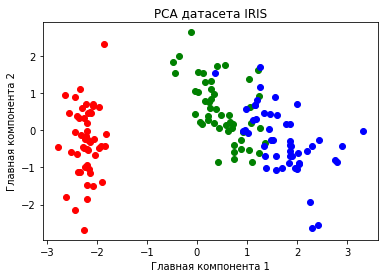

In [24]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [25]:
from sklearn import model_selection
from matplotlib.colors import ListedColormap

In [26]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)



def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers



def accuracy(pred, y):
    return (sum(pred==y)/len(y))



def get_graph(X_train, y_train, k):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = 0.02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [27]:
n, _ = X.shape
# Compute covariance matrix
covariance_matrix = np.dot(X.T, X) / (n-1)
print(covariance_matrix)


# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)


# SVD
U, Sigma, Vh = np.linalg.svd(X, full_matrices=False, compute_uv=True)

# Relationship between singular values and eigen values:
print(np.allclose(np.square(Sigma) / (n - 1), eigen_vals)) # True

[[35.05939597 17.94248322 23.3809396   7.5714094 ]
 [17.94248322  9.6        11.23691275  3.56973154]
 [23.3809396  11.23691275 17.33362416  5.83295302]
 [ 7.5714094   3.56973154  5.83295302  2.0290604 ]]
True


In [28]:
W = np.hstack((Vh[0].reshape(4,1), Vh[1].reshape(4,1)))
Z = X.dot(W)

In [29]:
Z[:3]

array([[-5.91274714,  2.30203322],
       [-5.57248242,  1.97182599],
       [-5.44697714,  2.09520636]])

Text(0.5, 1.0, 'PCA датасета IRIS')

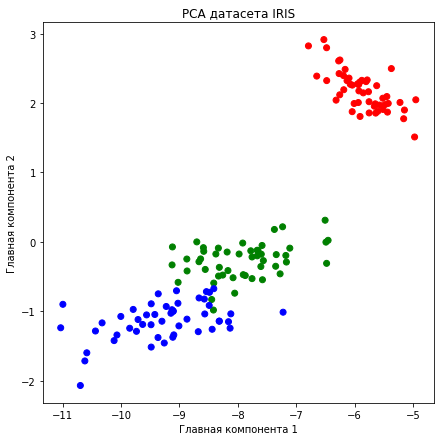

In [30]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap=cmap)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')

In [31]:
Z_train, Z_test, y_train, y_test = model_selection.train_test_split(Z, y, test_size=0.2, random_state=42)

In [32]:
Z_train[:3]

array([[-5.36999813e+00,  2.49808604e+00],
       [-6.79037199e+00,  2.82500759e+00],
       [-8.70300135e+00, -3.83374315e-04]])

In [33]:
k=3

y_pred = knn(Z_train, y_train, Z_train, k)
print(f'Точность на train knn при k = {k}: {round(accuracy(y_pred, y_train), 3)}')

Точность на train knn при k = 3: 0.975


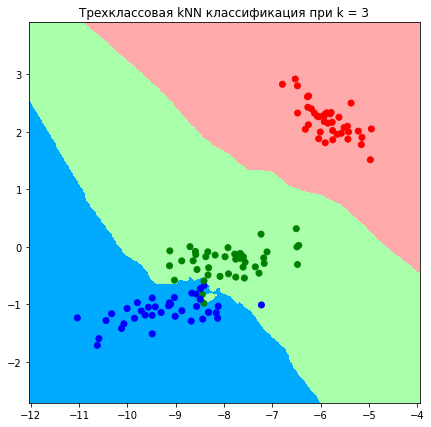

In [34]:
get_graph(Z_train, y_train, 3)

In [35]:
iris = datasets.load_iris()
X = iris.data
X.shape
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

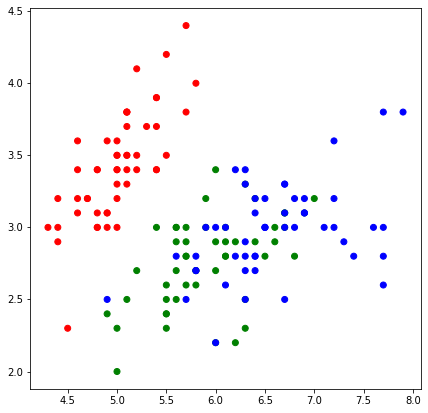

In [36]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

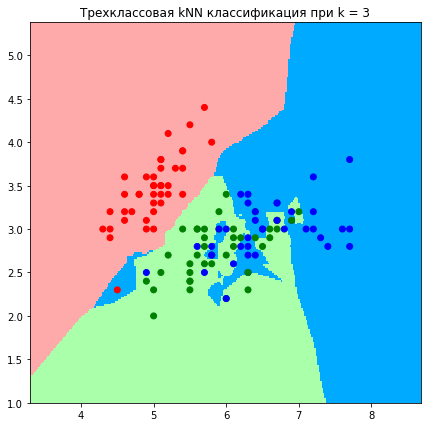

In [37]:
get_graph(X_train, y_train, 3)

In [38]:
k=3

y_pred = knn(X_train, y_train, X_train, k)
print(f'Точность на train knn при k = {k}: {round(accuracy(y_pred, y_train), 3)}')

Точность на train knn при k = 3: 0.95


In [39]:
X_ = np.concatenate((X_train, X_test))
X_.shape

(150, 4)

In [40]:
# X_ = X.astype(float)

rows, cols = X_.shape

means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]
        
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]
        
covariance_matrix = np.dot(X_.T, X_)
print(covariance_matrix)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

[[150.         -17.63546762 130.76306638 122.69116894]
 [-17.63546762 150.         -64.26601565 -54.91888988]
 [130.76306638 -64.26601565 150.         144.42981471]
 [122.69116894 -54.91888988 144.42981471 150.        ]]


In [41]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

for i in eig_pairs:
    print(i[0])

437.7746724797995
137.1045707202104
22.013531335697245
3.107225464292882


In [42]:
var_exp = [(i/sum(eig_values))*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [43]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

In [44]:
Z = X_.dot(W)

In [45]:
print(X.shape)
Z.shape

(150, 4)


(150, 2)

In [46]:
#Z_train, Z_test, y_train, y_test = model_selection.train_test_split(Z, y, test_size=0.2, random_state=42)

In [47]:
k=3

y_pred = knn(Z_train, y_train, Z_train, k)
print(f'Точность на train knn при k = {k}: {round(accuracy(y_pred, y_train), 3)}')

Точность на train knn при k = 3: 0.975


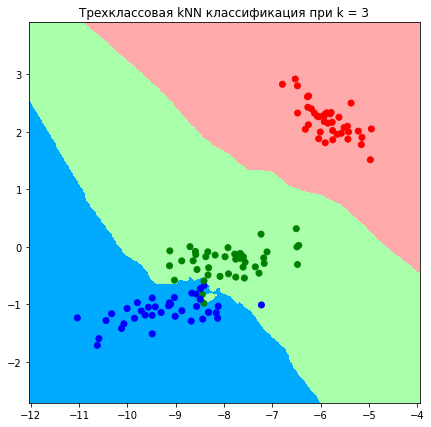

In [48]:
get_graph(Z_train, y_train, 3)

При сокращении признаков с 4-х до 2-х точность предсказания поднялась на 0.025.